In [19]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [20]:
# Load the dataset
df = pd.read_csv(r"D:\Personal files\Data science Materials\ICT Academy_Materials\Data sets\car_age_price.csv")
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [21]:
#checking for null values
df.isna().sum()

Year     0
Price    0
dtype: int64

In [22]:
df.shape

(112, 2)

In [23]:
# separating Feature value and Target values
x=df.drop('Price',axis=1)
y =df['Price']

In [24]:
# Spliting data into test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=42,test_size=0.25)

In [25]:
# For linear regression
lin_reg = LinearRegression()
model = lin_reg.fit(x_train,y_train)

#### Predicted price

In [26]:
# Predicting price of second-hand Grand i10 for the year 2022 with Linear Regression
predicted_val = lin_reg.predict([[2022]])[0]
print("Predicted price of a 2022 model second-hand Grand i10:", predicted_val)

Predicted price of a 2022 model second-hand Grand i10: 740160.1193776578


C:\Users\karth\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Best fit line

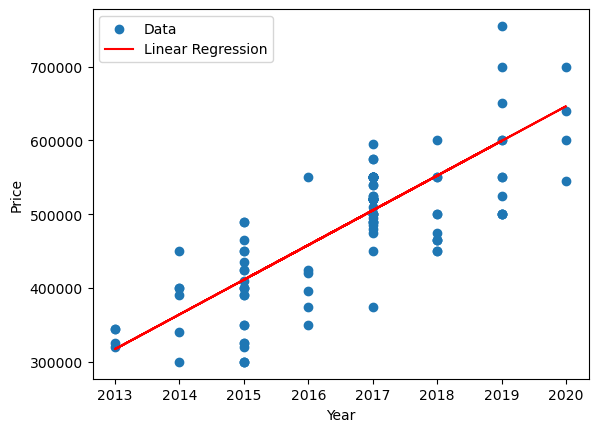

In [27]:
plt.scatter(x, y, label='Data')
plt.plot(x_test, model.predict(x_test), color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

In [28]:
print("Best fit line:- "+" y = " + str(lin_reg.coef_[0]) + "X + " + str(lin_reg.intercept_))

Best fit line:-  y = 46979.01544554457X + -94251409.11151347


In [29]:
# for Lasso regression
lasso_reg = Lasso()
model_lasso=lasso_reg.fit(x_train, y_train)

In [30]:
# Predicting price of second-hand Grand i10 for the year 2022 with lasso regression
predicted_val = lasso_reg.predict([[2022]])[0]
predicted_val

C:\Users\karth\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


740157.9570014179

In [31]:
# Comparing models with r2_score and Score
lin_reg_score = lin_reg.score(x_test, y_test)
lasso_reg_score = lasso_reg.score(x_test, y_test)

In [32]:
a=model.predict(x_test)
b=model_lasso.predict(x_test)

In [33]:
print("Linear regression score:", lin_reg_score)
print("Lasso regression score:", lasso_reg_score)

Linear regression score: 0.43479616321090353
Lasso regression score: 0.4348007175862566


In [34]:
print('R^2 Value for Linear Regression Model is:- ', r2_score(y_test,a ))
print('R^2 Value for Lasso Regression Model is:- ', r2_score(y_test,b ))

R^2 Value for Linear Regression Model is:-  0.43479616321090353
R^2 Value for Lasso Regression Model is:-  0.4348007175862566


In [35]:
# Determine which model is performing better
if lin_reg_score > lasso_reg_score:
    print("Linear regression is better.")
else:
    print("Lasso regression is better.")

Lasso regression is better.


#### From this we could conclude Lasso regession is performing better than Linear Regression in this case.